# Visualise Double Pendulum using forward Euler, Symplectic Euler, Verlet and RK4 integrators

In [ ]:
import sys
sys.path.append('..')

import numpy as np
import math
from matplotlib import pyplot as plt
from Code.time_integrator import *
from Code.dynamical_system import *

##Define parameters for the double pendulum chaotic system

In [ ]:
np.random.seed(2512517)
mass = [1,1]
L1 = 1
L2 = 1
g = 9.81
dt = 0.0005
T_final = 400.0
DoublePendulum = DoublePendulum(mass, L1, L2, g)
forward_euler_integrator = ForwardEulerIntegrator(DoublePendulum,dt)
verlet_integrator = VerletIntegrator(DoublePendulum,dt)
symplectic_euler_integrator = SymplecticEulerIntegrator(DoublePendulum,dt)
rk4_integrator = RK4Integrator(DoublePendulum,dt)
x = np.zeros((1,2))
v = np.zeros((1,2))
x[0] = [(math.pi)/4,(math.pi)/4]
v[0] = [0,0]

##Integrate using the given numerical methods

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((4,n_step))
x_phase = np.zeros((4,n_step,2))
v_phase = np.zeros((4,n_step,2))

for j, integrator in enumerate((forward_euler_integrator,verlet_integrator,symplectic_euler_integrator,rk4_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = DoublePendulum.energy(integrator.x,integrator.v)
        x_phase[j,k,0] = integrator.x[0]
        x_phase[j,k,1] = integrator.x[1]
        v_phase[j,k,0] = integrator.v[0]
        v_phase[j,k,1] = integrator.v[1]
        integrator.integrate(1)    

##Compute Cartesian Coordinates of both masses

In [ ]:

cartesian_1 = np.zeros((4,n_step,2))
cartesian_1[:,:,0] = L1 * np.sin(x_phase[:,:,0]) #x-coordinates of mass 1
cartesian_1[:,:,1] = -L1 * np.cos(x_phase[:,:,0]) #y-coordinates of mass 1

cartesian_2 = np.zeros((4,n_step,2))
cartesian_2[:,:,0] = L1 * np.sin(x_phase[:,:,0]) + L2 * np.sin(x_phase[:,:,1]) #x-coordinates of mass 2
cartesian_2[:,:,1] = -L1 * np.cos(x_phase[:,:,0]) - L2 * np.cos(x_phase[:,:,1])#y-coordinates of mass 2



## Plot phase space diagram of the first mass / bob

Text(0.5, 0, 'x-position $x$')

<Figure size 1440x576 with 0 Axes>

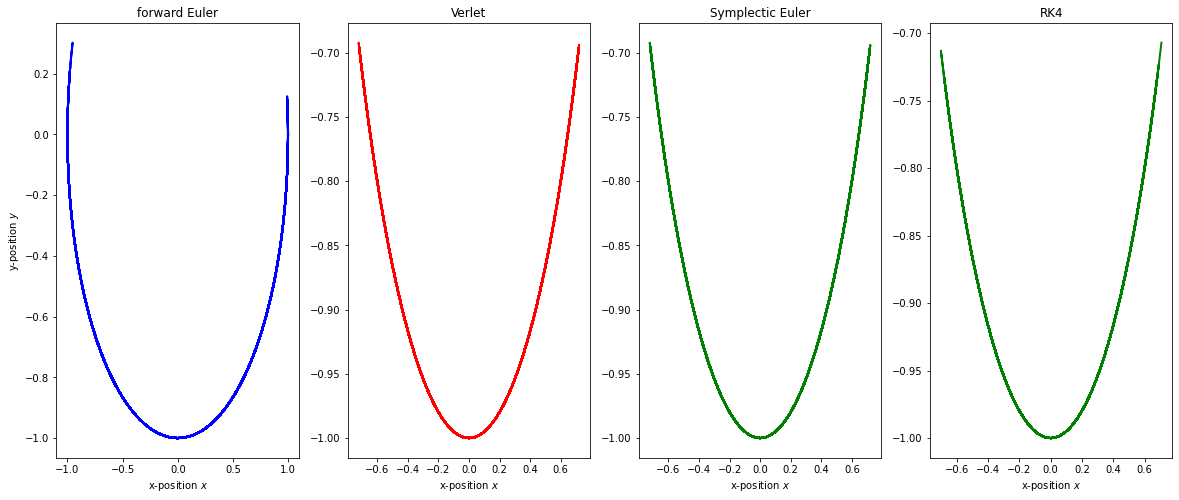

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,4)
X = dt*np.arange(n_step)
axs[0].plot(cartesian_1[0,:,0],cartesian_1[0,:,1],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('x-position $x$')
axs[0].set_ylabel('y-position $y$')
axs[1].plot(cartesian_1[1,:,0],cartesian_1[1,:,1],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('x-position $x$')
axs[2].plot(cartesian_1[2,:,0],cartesian_1[2,:,1],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('x-position $x$')
axs[3].plot(cartesian_1[3,:,0],cartesian_1[3,:,1],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('x-position $x$')

## Plot phase space diagram of the second mass / bob

Text(0.5, 0, 'x-position $x$')

<Figure size 1440x576 with 0 Axes>

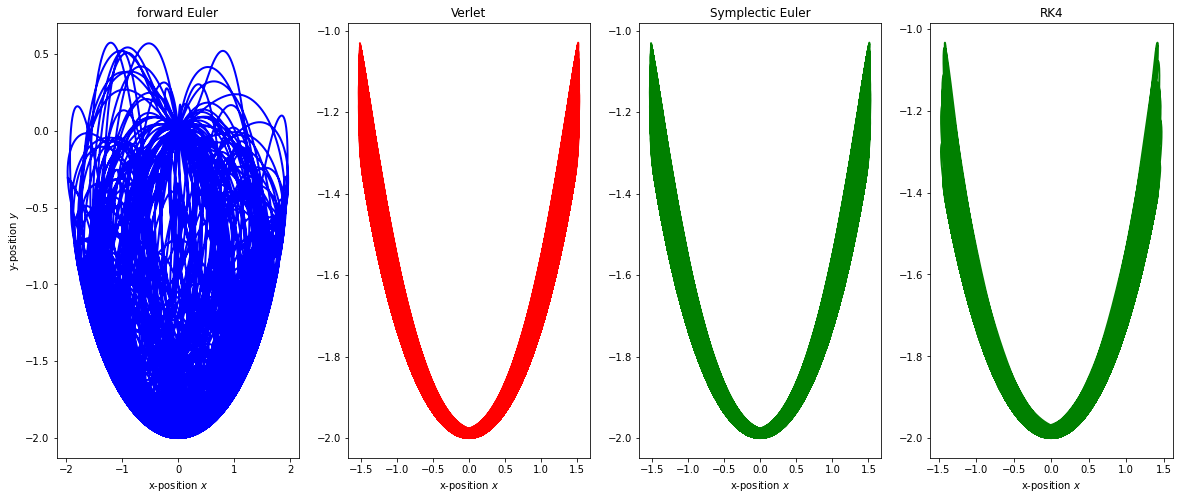

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,4)
X = dt*np.arange(n_step)
axs[0].plot(cartesian_2[0,:,0],cartesian_2[0,:,1],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('x-position $x$')
axs[0].set_ylabel('y-position $y$')
axs[1].plot(cartesian_2[1,:,0],cartesian_2[1,:,1],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('x-position $x$')
axs[2].plot(cartesian_2[2,:,0],cartesian_2[2,:,1],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('x-position $x$')
axs[3].plot(cartesian_2[3,:,0],cartesian_2[3,:,1],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('x-position $x$')

## Plot energy drift 

<Figure size 1440x576 with 0 Axes>

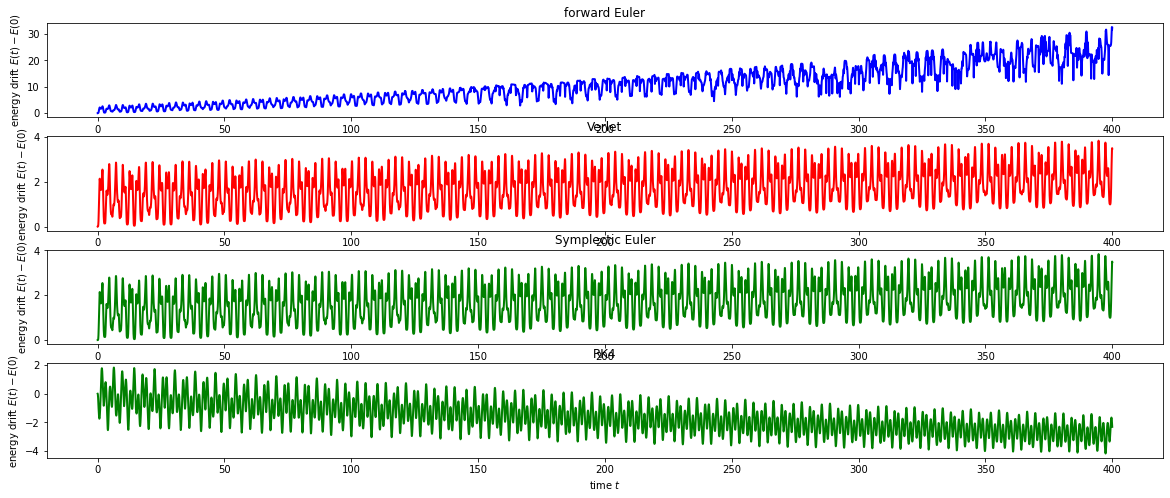

In [ ]:
plt.clf()

plt.rcParams['figure.figsize'] = [20, 8]
figs, axs = plt.subplots(4,1)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('time $t$')
axs[1].set_ylabel('energy drift $E(t)-E(0)$')
axs[2].plot(X,energies[2,:]-energies[2,0],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('time $t$')
axs[2].set_ylabel('energy drift $E(t)-E(0)$')
axs[3].plot(X,energies[3,:]-energies[3,0],linewidth=2,color='green')
axs[3].set_title('RK4')
axs[3].set_xlabel('time $t$')
axs[3].set_ylabel('energy drift $E(t)-E(0)$')
plt.savefig('energies.pdf',bbox_inches='tight')